In [5]:
import os
if not os.path.exists("cifar-10-batches-py"):
    os.system("""
                wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
                tar -xvf cifar-10-python.tar.gz"""
    )
    # os.system("wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz")


In [6]:
from matplotlib import pyplot as plt
import pickle

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [7]:
# extract all automobile / truck images
# img = train[b'data'][100].reshape(3,32,32).transpose((1,2,0))
import numpy as np
car_images = np.empty((0,3072), dtype=np.uint8)
truck_images = np.empty((0,3072), dtype=np.uint8)

batche_names = ["data_batch_1", "data_batch_2", "data_batch_3", "data_batch_4", "data_batch_5"]
for name in batche_names:
    print(name)
    batch = unpickle("cifar-10-batches-py/"+name)
    for label, image in zip(batch[b"labels"], batch[b"data"][:]):
        if label == 1:
            car_images = np.vstack([car_images, image.reshape((1,-1))])
        elif label == 9:
            truck_images = np.vstack([truck_images, image.reshape((1,-1))])
car_n = car_images.shape[0]
truck_n = truck_images.shape[0]
car_images = car_images.reshape(car_n,3,32,32).transpose((0,2,3,1))
truck_images = truck_images.reshape(truck_n,3,32,32).transpose((0,2,3,1))
np.save("train_car_images.npy", car_images)
np.save("train_truck_images.npy", truck_images)

data_batch_1
data_batch_2
data_batch_3
data_batch_4
data_batch_5


In [9]:
import numpy as np
car_images = np.empty((0,3072), dtype=np.uint8)
truck_images = np.empty((0,3072), dtype=np.uint8)

batche_names = ["test_batch"]
for name in batche_names:
    print(name)
    batch = unpickle("cifar-10-batches-py/"+name)
    for label, image in zip(batch[b"labels"], batch[b"data"][:]):
        if label == 1:
            car_images = np.vstack([car_images, image.reshape((1,-1))])
        elif label == 9:
            truck_images = np.vstack([truck_images, image.reshape((1,-1))])
car_n = car_images.shape[0]
truck_n = truck_images.shape[0]
car_images = car_images.reshape(car_n,3,32,32).transpose((0,2,3,1))
truck_images = truck_images.reshape(truck_n,3,32,32).transpose((0,2,3,1))
np.save("test_car_images.npy", car_images)
np.save("test_truck_images.npy", truck_images)

test_batch


In [11]:
print(car_images.shape)
print(truck_images.shape)

(1000, 32, 32, 3)
(1000, 32, 32, 3)


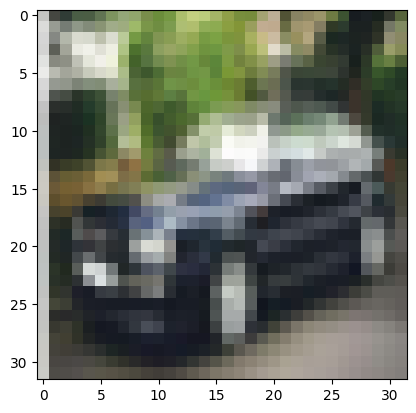

In [12]:
plt.imshow(car_images[100])